In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [38]:
data = pd.read_csv("../rawdata/landslide_data.csv")
print(data.shape)


(7482, 16)


## data exploration

FEATTYPE       object
SCALE         float64
FACAFF         object
elevation       int64
aspect        float64
slope         float64
landuse         int64
Period         object
Years_befo     object
Main_Rock_     object
NDVI          float64
distance      float64
total_curv    float64
plan_curv     float64
prof_curv     float64
Label           int64
dtype: object

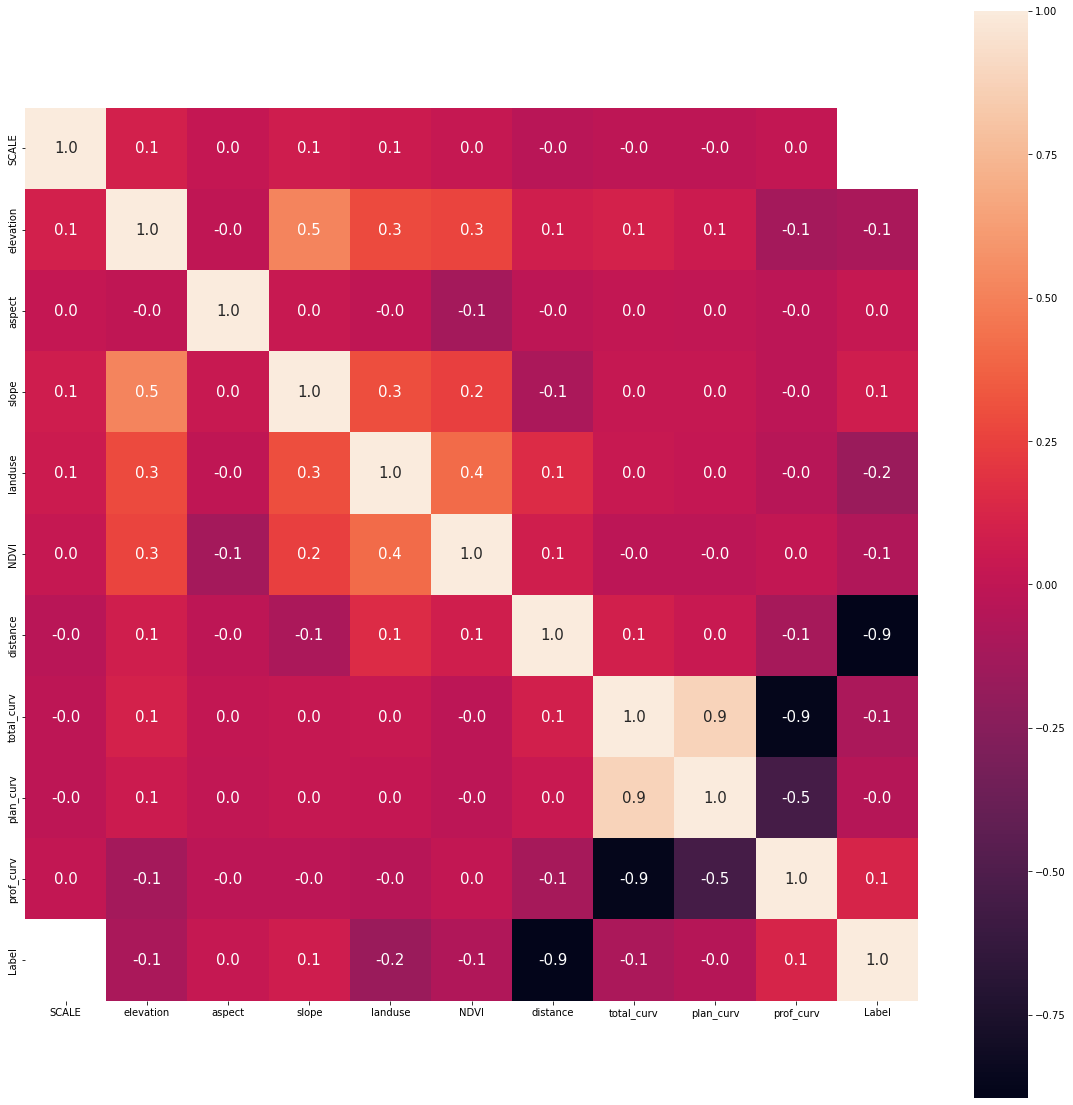

In [15]:
# low correlation
plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
data.head()
data.dtypes


## data process

In [39]:
#reclassify land use types
def landuse_cal(landuse_befo):
    if landuse_befo <= 54:
        return 'urban'
    elif landuse_befo == 72:
        return 'Shrubland'
    elif landuse_befo == 73 or landuse_befo == 81:
        return 'Grassland'
    elif landuse_befo == 71:
        return 'forest'
    elif landuse_befo == 61:
        return 'Agriculture'
    elif landuse_befo == 74:
        return 'Wetland'
    else :
        return 'water'

In [40]:
data['landuse'] = data['landuse'].apply(landuse_cal)
data.head()

,FEATTYPE,SCALE,FACAFF,elevation,aspect,slope,landuse,Period,Years_befo,Main_Rock_,NDVI,distance,total_curv,plan_curv,prof_curv,Label
0,Retaining Wall (Masonry),1.5,Minor footpath; other (platform above the reta...,52,330.524,2.04472,urban,Quaternary,0-1.8,"Superficial Deposits (Silt, sand and gravel)",0.193857,17.340808,-0.282579,-0.181710,0.100869,1
1,Fill Slope,18.0,Open area,1,225.000,1.86081,Agriculture,Quaternary,0-1.8,"Superficial Deposits (Silt, sand and gravel)",0.292597,51.054059,0.282579,0.289513,0.006934,1
2,Soil Cut,0.5,Minor footpath,6,149.534,3.05130,Shrubland,Quaternary,0-1.8,"Superficial Deposits (Silt, sand and gravel)",0.339637,130.601425,-0.208863,-0.102582,0.106281,1
3,Soil Cut,45.0,Access road,26,346.373,5.24349,urban,Quaternary,0-1.8,"Superficial Deposits (Silt, sand and gravel)",0.194702,384.036599,0.159719,0.161805,0.002086,1
4,Soil Cut,0.3,Other (alleyway),22,335.999,11.45630,urban,Quaternary,0-1.8,"Superficial Deposits (Silt, sand and gravel)",0.155207,370.113211,-0.651161,-0.205214,0.445947,1


In [41]:
df2 = pd.get_dummies(data, columns=['Main_Rock_','Period','FEATTYPE','FACAFF','landuse'])
df2.loc[df2['Label']==0,'SCALE']=0
#check na value
df2.isnull().sum()

def year_cal(Years_befo):
    if Years_befo == '0-1.8':
        return 1.8
    elif Years_befo == '145-199':
        return 145
    elif Years_befo == '359-416':
        return 359
    elif Years_befo == '65-145':
        return 65
    #Years_befo == '299-359'
    else :
        return 299
    
df2['Year'] = df2['Years_befo'].apply(year_cal)
df2

,SCALE,elevation,aspect,slope,Years_befo,NDVI,distance,total_curv,plan_curv,prof_curv,...,FACAFF_Water treatment plant,FACAFF_footpath,landuse_Agriculture,landuse_Grassland,landuse_Shrubland,landuse_Wetland,landuse_forest,landuse_urban,landuse_water,Year
0,1.5,52,330.5240,2.04472,0-1.8,0.193857,17.340808,-0.282579,-0.181710,0.100869,...,0,0,0,0,0,0,0,1,0,1.8
1,18.0,1,225.0000,1.86081,0-1.8,0.292597,51.054059,0.282579,0.289513,0.006934,...,0,0,1,0,0,0,0,0,0,1.8
2,0.5,6,149.5340,3.05130,0-1.8,0.339637,130.601425,-0.208863,-0.102582,0.106281,...,0,0,0,0,1,0,0,0,0,1.8
3,45.0,26,346.3730,5.24349,0-1.8,0.194702,384.036599,0.159719,0.161805,0.002086,...,0,0,0,0,0,0,0,1,0,1.8
4,0.3,22,335.9990,11.45630,0-1.8,0.155207,370.113211,-0.651161,-0.205214,0.445947,...,0,0,0,0,0,0,0,1,0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,0.0,251,101.6540,23.82310,65-145,0.380204,28740.799350,0.958313,0.460359,-0.497954,...,0,0,0,0,1,0,0,0,0,65.0
7478,0.0,199,10.4915,12.55170,65-145,0.318335,28743.914350,-0.159719,0.082707,0.242426,...,0,0,0,0,1,0,0,0,0,65.0
7479,0.0,169,121.8570,21.13720,65-145,0.344763,28747.365230,-0.430012,-0.373889,0.056123,...,0,0,0,0,1,0,0,0,0,65.0
7480,0.0,29,329.5340,3.05130,0-1.8,0.285900,28749.072030,-0.110575,-0.057461,0.053114,...,0,0,0,0,0,0,0,1,0,1.8


In [48]:
col= df2.columns[pd.np.r_[0:4,5:15,16:420]]
print(col)
#get x value
x = np.array(df2[col])
x.shape

Index(['SCALE', 'elevation', 'aspect', 'slope', 'NDVI', 'distance',
       'total_curv', 'plan_curv', 'prof_curv', 'Label',
       ...
       'FACAFF_Walking trail', 'FACAFF_Water treatment plant',
       'FACAFF_footpath', 'landuse_Agriculture', 'landuse_Grassland',
       'landuse_Shrubland', 'landuse_Wetland', 'landuse_forest',
       'landuse_urban', 'landuse_water'],
      dtype='object', length=418)


C:\Users\zheng\AppData\Local\Temp/ipykernel_24016/316648795.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= df2.columns[pd.np.r_[0:4,5:15,16:420]]


(7482, 418)

In [43]:
# get y value
y=np.array(df2['Label'])
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## machine learning model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5)

In [47]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ValueError: could not convert string to float: '65-145'

In [118]:
clf.fit(X_train,y_train)


KNeighborsClassifier()

In [121]:
y_pred=clf.predict(X_test)


In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9639198218262807

### deep learning model

In [166]:
print(X_train.shape)


(5237, 412)


In [164]:
from sklearn import preprocessing
y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [172]:
model = Sequential()
model.add(Dense(80, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [173]:
model.fit(X_train, y_train,epochs=20)


Epoch 1/20
164/164 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9675
Epoch 2/20
164/164 [==============================] - 0s 2ms/step - loss: 2.2807e-04 - accuracy: 1.0000
Epoch 3/20
164/164 [==============================] - 0s 2ms/step - loss: 8.4926e-05 - accuracy: 1.0000
Epoch 4/20
164/164 [==============================] - 0s 2ms/step - loss: 4.3409e-05 - accuracy: 1.0000
Epoch 5/20
164/164 [==============================] - 0s 2ms/step - loss: 2.5922e-05 - accuracy: 1.0000
Epoch 6/20
164/164 [==============================] - 0s 2ms/step - loss: 1.7023e-05 - accuracy: 1.0000
Epoch 7/20
164/164 [==============================] - 0s 2ms/step - loss: 1.1918e-05 - accuracy: 1.0000
Epoch 8/20
164/164 [==============================] - 0s 3ms/step - loss: 8.7281e-06 - accuracy: 1.0000
Epoch 9/20
164/164 [==============================] - 0s 2ms/step - loss: 6.6097e-06 - accuracy: 1.0000
Epoch 10/20
164/164 [==============================] - 0s 2ms/step -

In [174]:
results = model.evaluate(X_test, y_test, batch_size=128)


18/18 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9991
